# Feature Engineering and Selection
### Feature engineering and selection

1. Check for non-informative predictors
    - is there a feature with ≤5−10% variance
    - Wrapper methods to find the optimal combination of features that maximizes model performance
2. Check for missingness
    - what type of missingness it is? (informative or random)
    - KNN imputation
3. Check for skewness
    - normalize
4. Do we need to center and scale (standardize)?
    - log
    - z-score
    - rescaling
5. Check for extreme values
6. Check for imbalanced distributions
7. Check for redundant features
8. Perform dimension reduction (e.g., PCA) on numeric features.
9. Do we need to one-hot or dummy encode categorical features? (ocean proximity)

### Target transformation

- Check for skewness
    - box cox
    - Yeo-Johnson

### Exploratory data analysis

- Clustering (based on ocean proximity?)

### Data splitting

- Simple random sampling
- Stratified sampling
- Validation set
    - bootstrapping
    - k-fold validation

### Measure predictive accuracy

- MSE
- RMSE
## Prerequisites

In [12]:
# helper packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
# model preprocessing
import sklearn 

## Cali dataset

In [2]:
# read california housing dataset
cali = pd.read_csv("../data/housing.csv")
# show dimensions
cali.shape

(20640, 10)

In [4]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
cali.sample(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17780    -121.84     37.38                33.0        835.0           181.0   
10807    -117.93     33.65                35.0       2133.0           413.0   
7065     -118.04     33.94                37.0       1328.0           273.0   
11082    -117.86     33.82                 9.0       1682.0           291.0   
15549    -117.08     33.11                31.0       1356.0           324.0   
971      -121.90     37.67                15.0       2130.0           273.0   
17632    -121.92     37.27                33.0       3280.0           569.0   
8324     -118.30     33.95                35.0       1182.0           305.0   
4027     -118.55     34.18                32.0       3011.0           529.0   
8592     -118.36     33.88                44.0       1362.0           237.0   
16019    -122.47     37.73                52.0       2151.0           280.0   
14656    -117.14     32.79                35.0       3578.0           582.0   
10068    -120.17     39.33                18.0       1046.0           204.0   
4877     -118.25     34.02                50.0        180.0            89.0   
9719     -121.73     36.90                23.0       2392.0           721.0   
13679    -117.24     34.04                 4.0       4289.0           682.0   
6385     -118.06     34.16                46.0       1467.0           298.0   
6743     -118.07     34.12                30.0       2201.0           559.0   
3999     -118.62     34.17                34.0       3268.0           538.0   
14717    -117.06     32.79                17.0       2524.0           332.0   

       population  households  median_income  median_house_value  \
17780       781.0       169.0         5.1082            195800.0   
10807      1473.0       402.0         4.4211            215200.0   
7065       1115.0       275.0         4.2051            164400.0   
11082      1015.0       271.0         6.6603            230900.0   
15549      1301.0       331.0         2.5331            115100.0   
971         876.0       285.0         7.2639            332400.0   
17632      1583.0       559.0         4.5625            253500.0   
8324        977.0       283.0         1.5898             94000.0   
4027       1287.0       525.0         5.0605            311000.0   
8592        709.0       247.0         4.4271            336200.0   
16019       762.0       274.0        10.7309            500001.0   
14656      1568.0       553.0         4.7813            188600.0   
10068       486.0       179.0         4.1190            110900.0   
4877        356.0        76.0         2.1944            158300.0   
9719       3074.0       718.0         2.5195            136900.0   
13679      1981.0       705.0         5.3366            165100.0   
6385        816.0       267.0         3.6705            286500.0   
6743       1194.0       531.0         4.1136            279900.0   
3999       1463.0       519.0         6.8482            308300.0   
14717       771.0       317.0         8.7604            331800.0   

      ocean_proximity  
17780       <1H OCEAN  
10807       <1H OCEAN  
7065        <1H OCEAN  
11082       <1H OCEAN  
15549       <1H OCEAN  
971         <1H OCEAN  
17632       <1H OCEAN  
8324        <1H OCEAN  
4027        <1H OCEAN  
8592        <1H OCEAN  
16019      NEAR OCEAN  
14656      NEAR OCEAN  
10068          INLAND  
4877        <1H OCEAN  
9719        <1H OCEAN  
13679          INLAND  
6385           INLAND  
6743           INLAND  
3999        <1H OCEAN  
14717       <1H OCEAN

In [34]:
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
cali.duplicated().sum()

0

In [35]:
cali.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [11]:
cali.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

<AxesSubplot:>

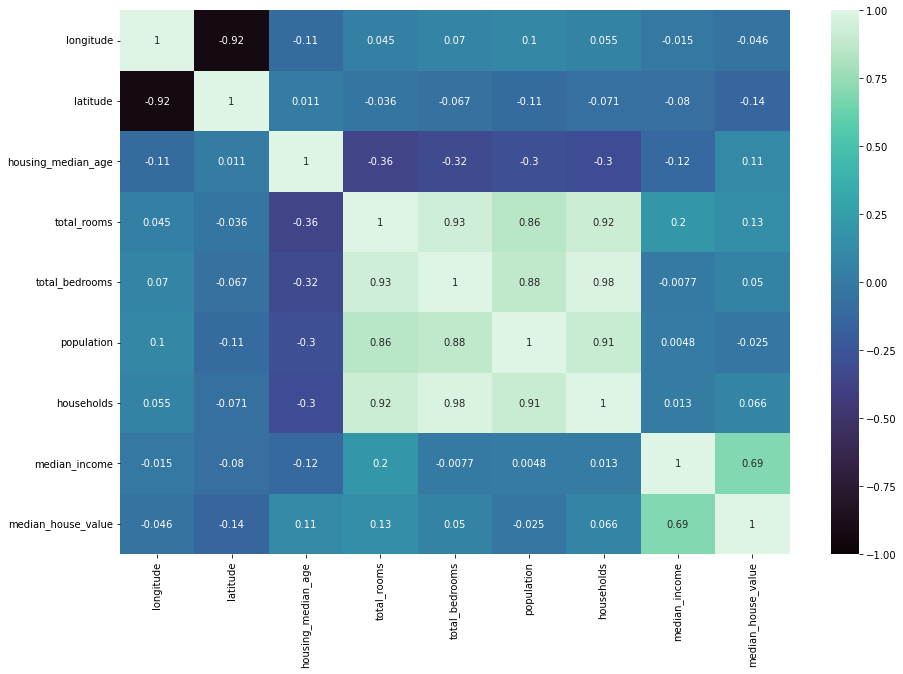

In [9]:

plt.figure(figsize=(15,10))
sns.heatmap(cali.corr(),cmap='mako', annot=True, vmin=-1, vmax=1)

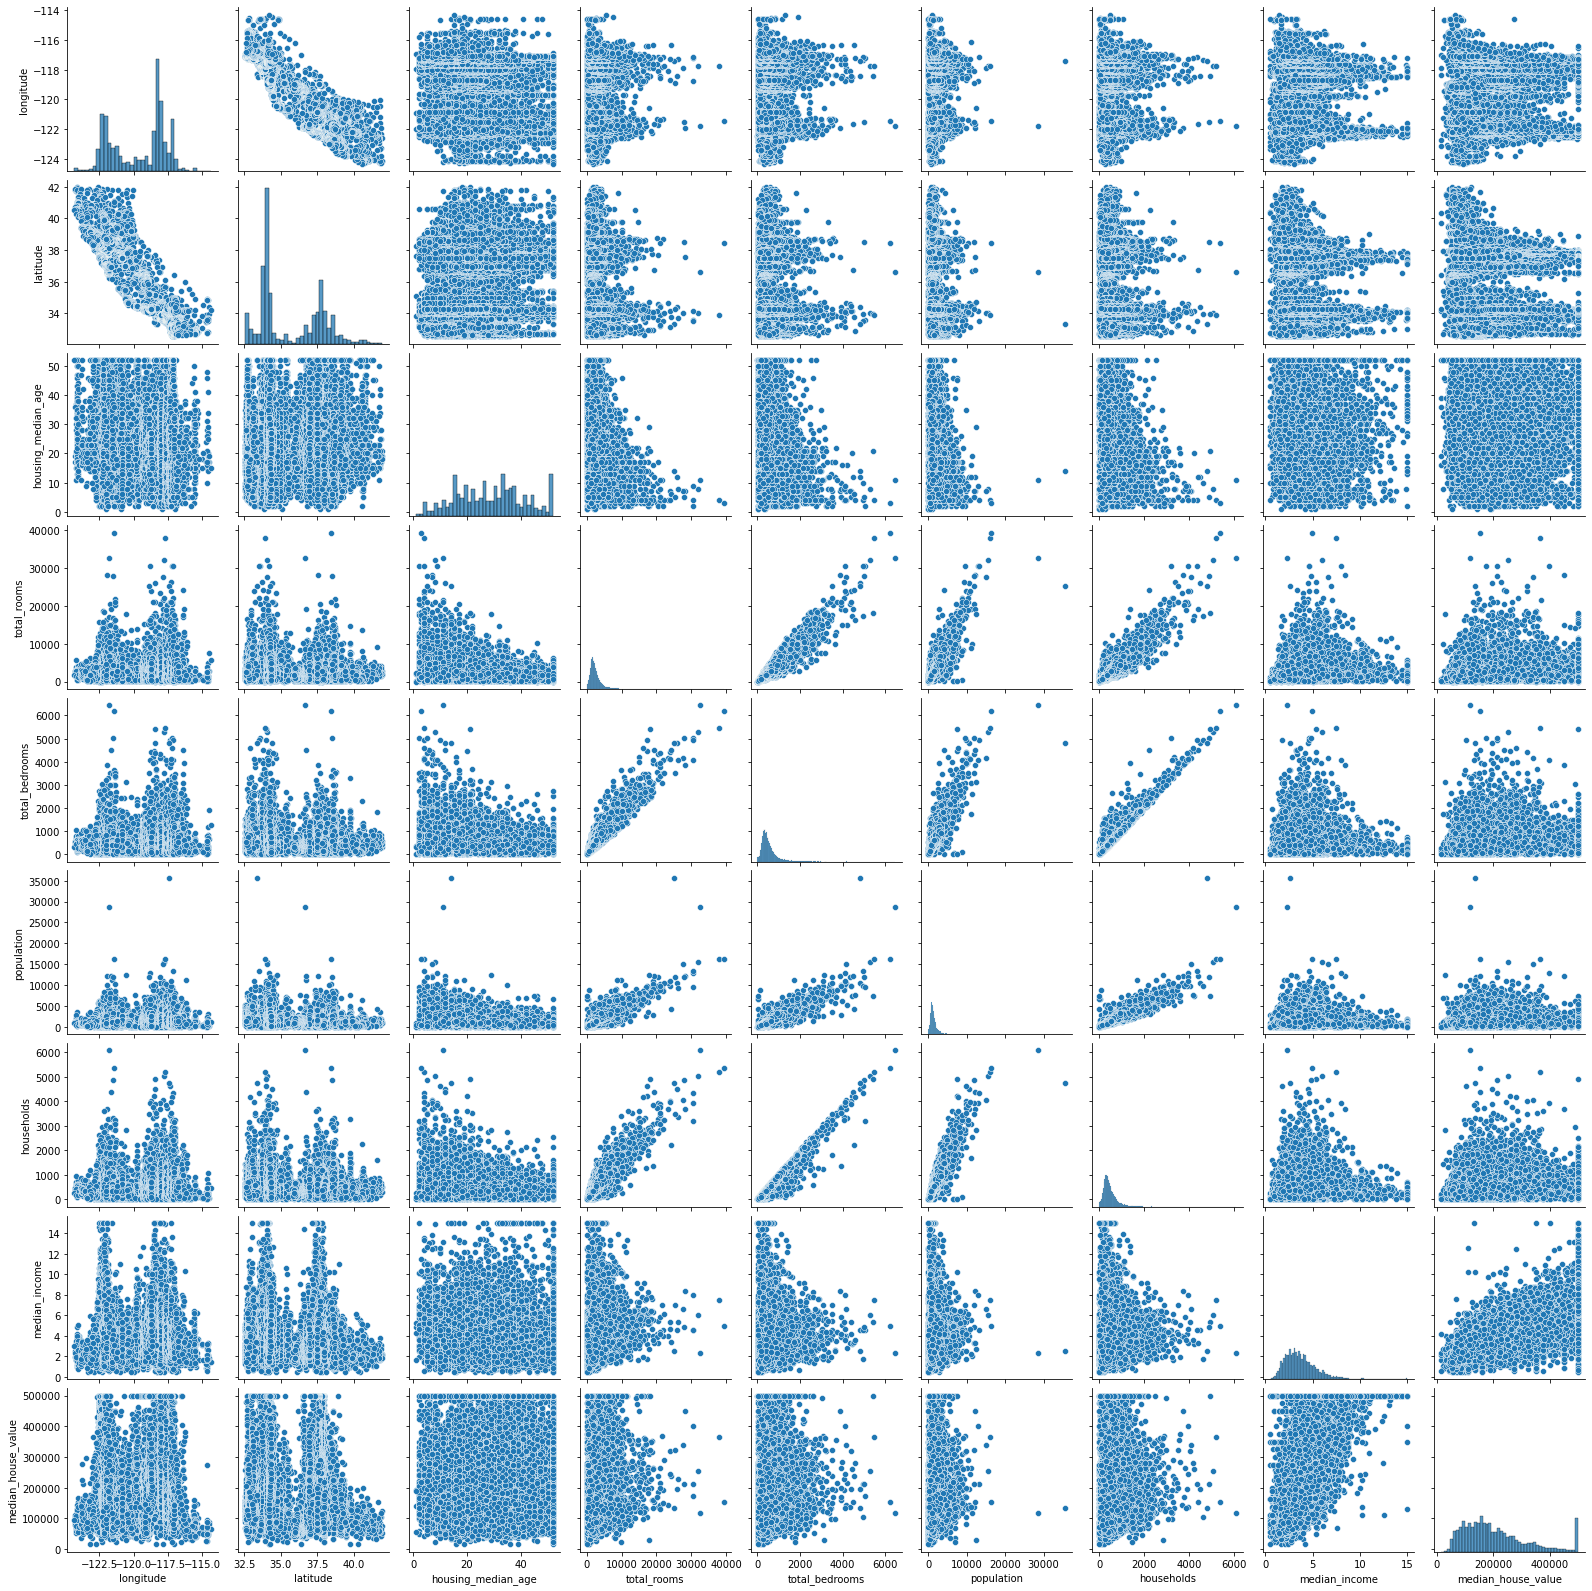

In [36]:

sns.pairplot(cali, plot_kws=dict());

In [4]:
# featues
cali.drop("median_house_value", axis=1).head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY

In [5]:
# target variable
cali["median_house_value"].head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

## Check for non-informative predictors .>>>

## Check for missingness <<>>

<AxesSubplot:>

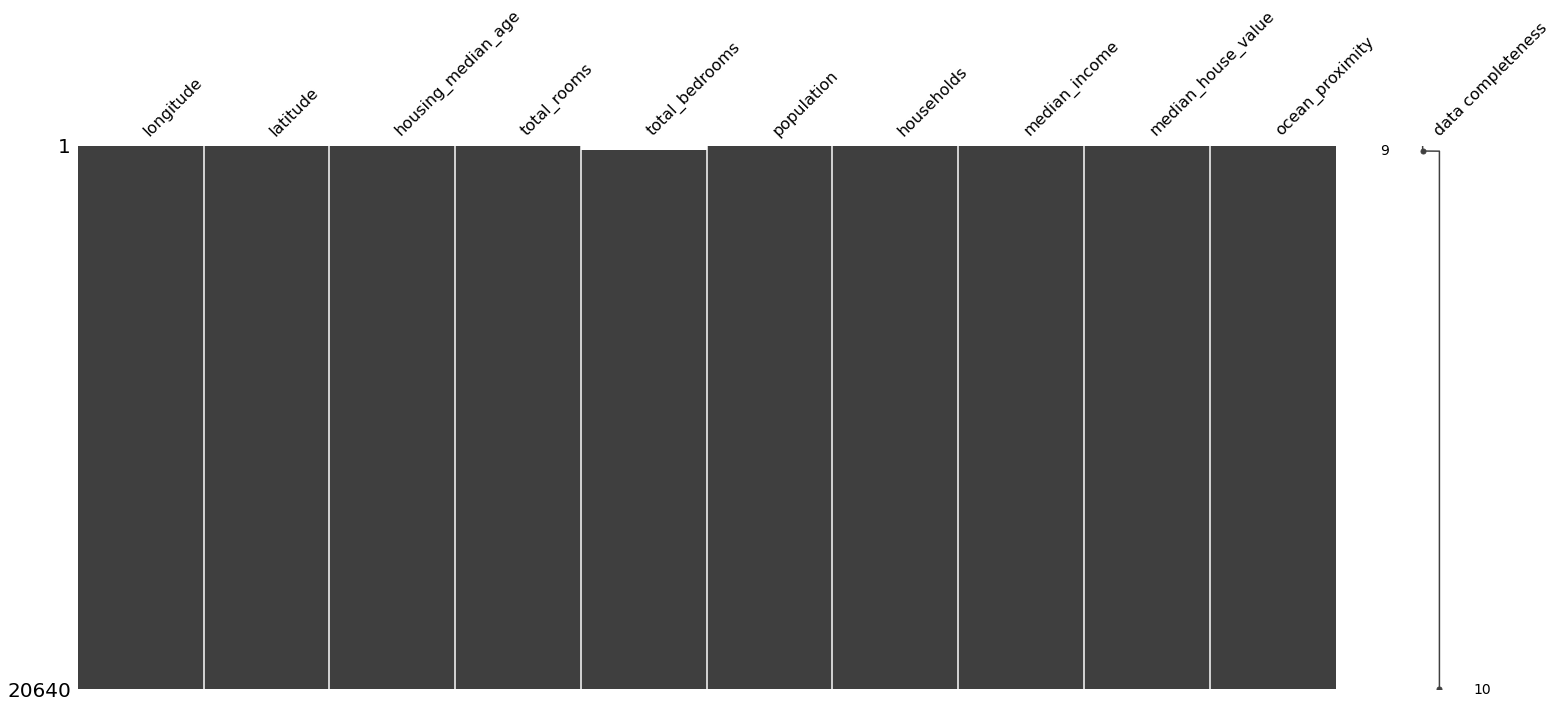

In [13]:
msno.matrix(cali, labels=True, filter="bottom", sort="ascending", n=50)

why its missing 

## Check for skewness >>> 

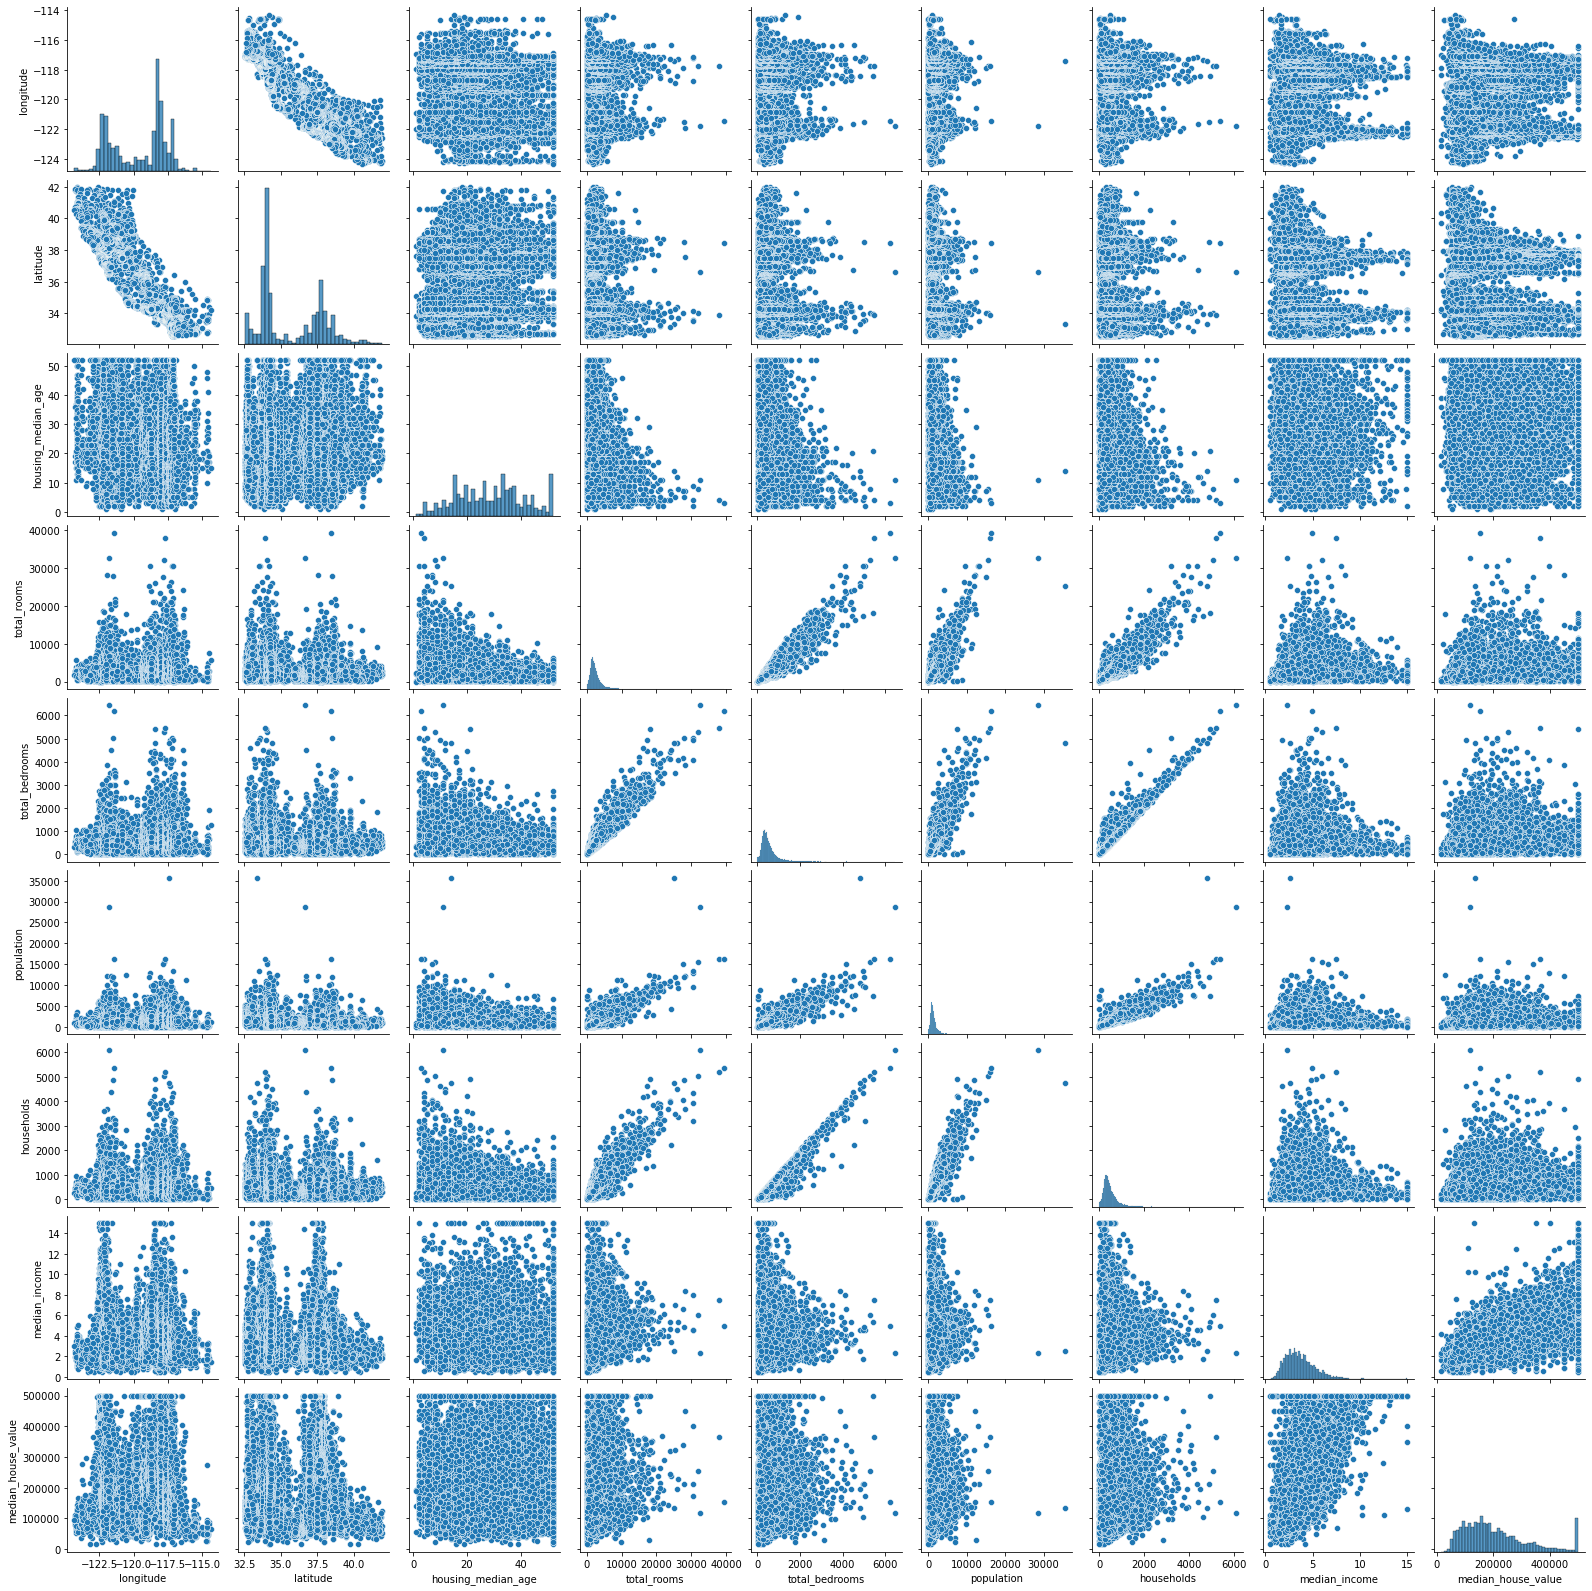

In [14]:
sns.pairplot(cali, plot_kws=dict());

## Data Standardization

## Check for extreme values

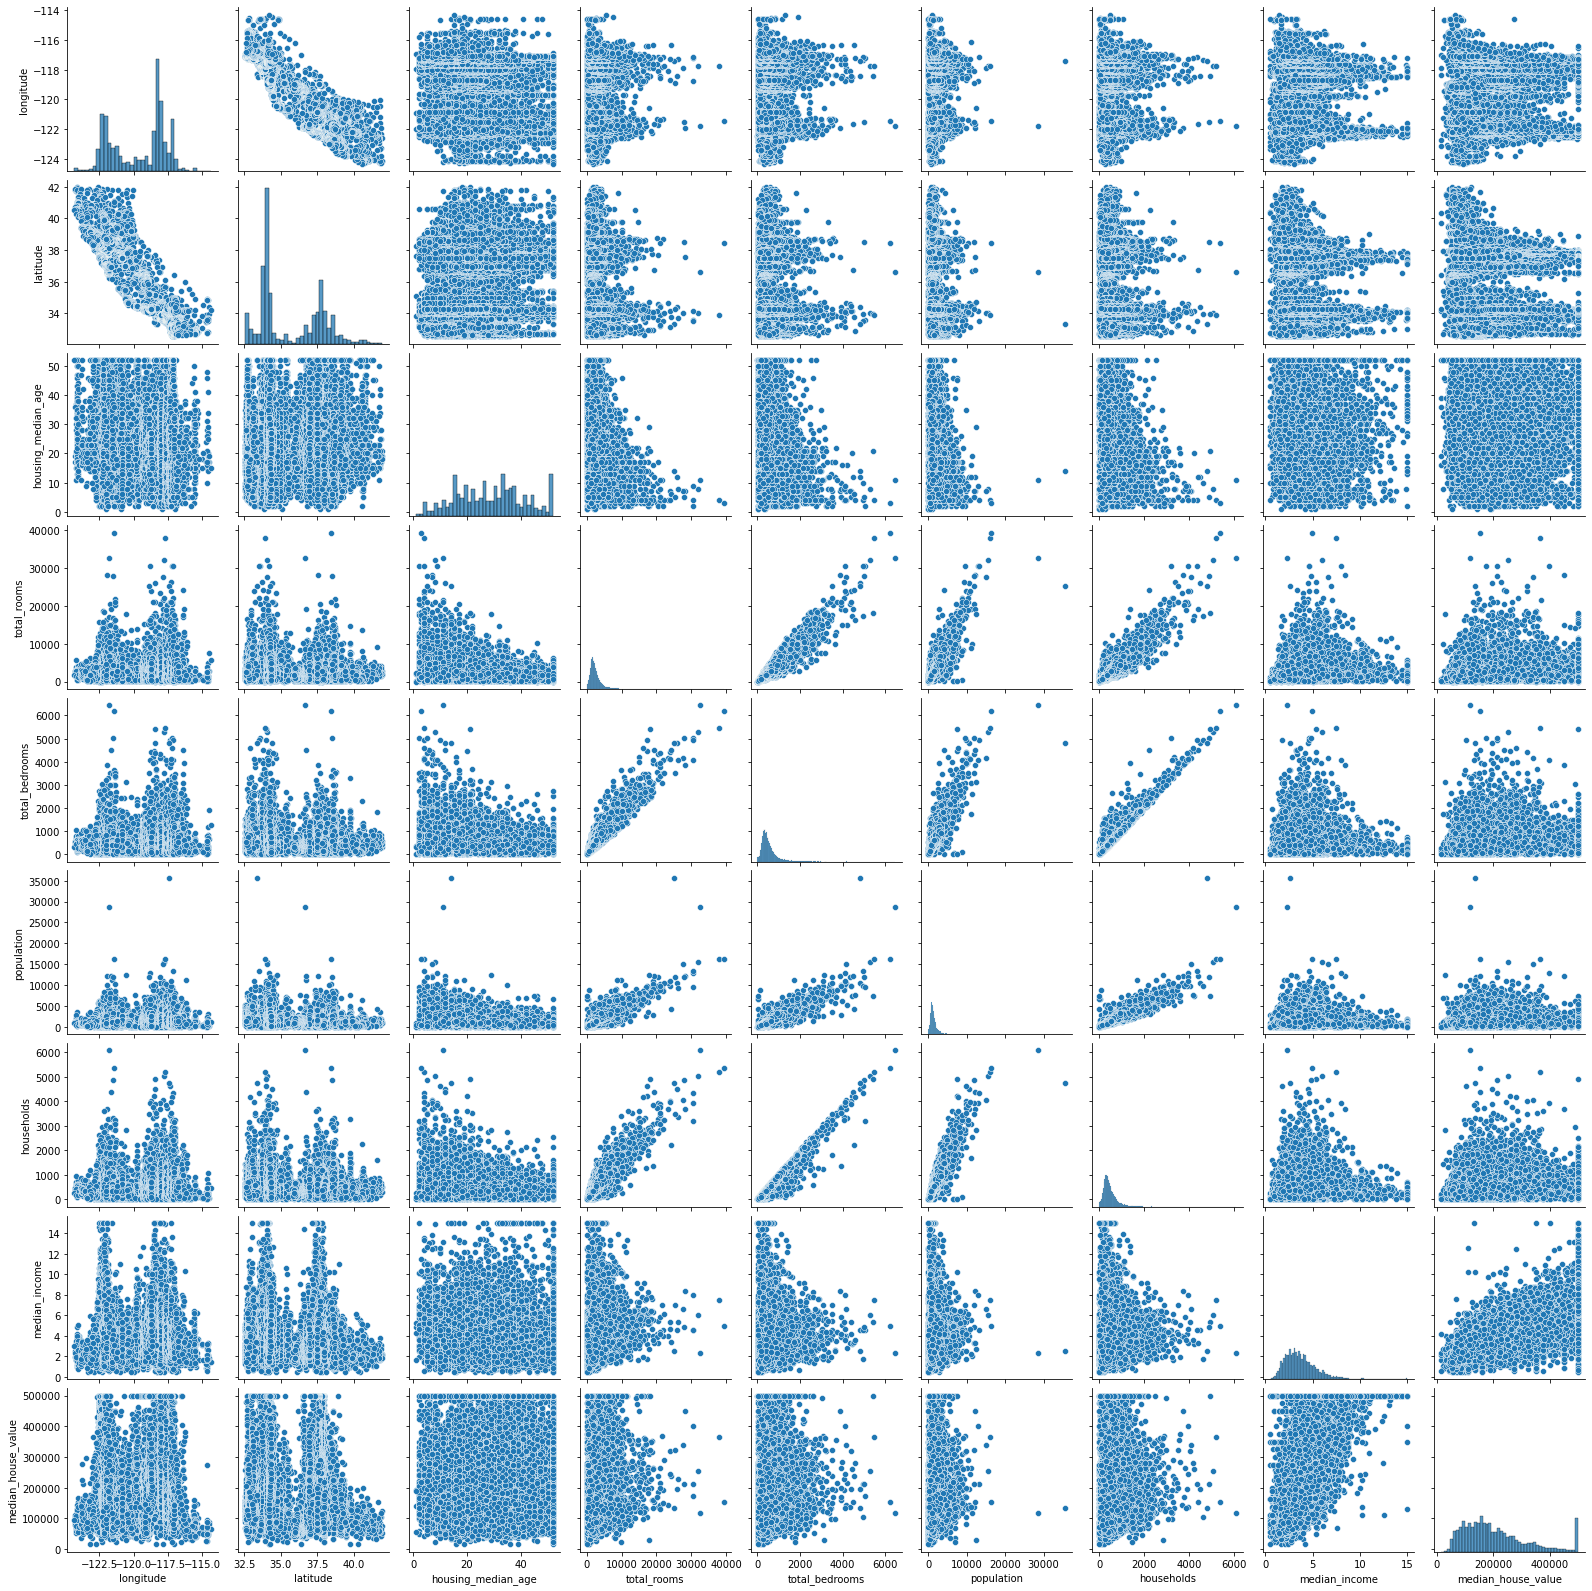

In [19]:
sns.pairplot(cali, plot_kws=dict());

<AxesSubplot:xlabel='total_rooms'>

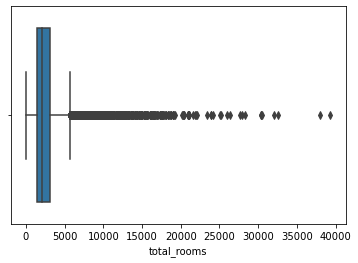

In [38]:
sns.boxplot(x=cali["total_rooms"])

<AxesSubplot:xlabel='total_bedrooms'>

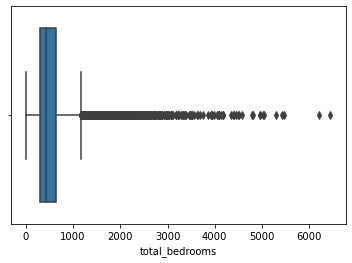

In [39]:
sns.boxplot(x=cali["total_bedrooms"])

<AxesSubplot:xlabel='population'>

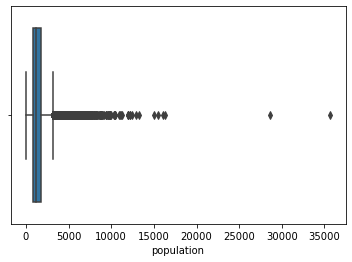

In [40]:
sns.boxplot(x=cali["population"])

<AxesSubplot:xlabel='households'>

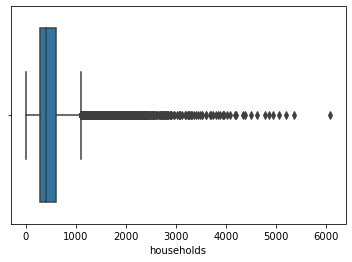

In [41]:
sns.boxplot(x=cali["households"])

## Check for imbalanced distributions

## Check for redundant features

## Dimension reduction

## One-hot encoding / Dummy encoding

In [42]:
cali.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Target Transformation
## Check for skewness